In [1]:
import pandas

In [2]:
data = pandas.read_csv('../datasets/tg/tg_with_name.csv')
data.count()

Structure Name     223
SMILES             223
Temperature [K]    223
dtype: int64

In [3]:
def polymer_class(smiles):
    if 'acrylate' in smiles:
        return 'Acrylate'
    elif 'amide' in smiles:
        return 'Amides'
    elif 'carbonate' in smiles:
        return 'Carbonates'
    elif 'ether' in smiles:
        return 'Ether'
    elif 'glycol' in smiles:
        return 'Glycol'
    elif 'styrene' in smiles:
        return 'Styrene'
    elif 'vinyl' in smiles:
        return 'Vinyl'
    else:
        return 'Others'

In [4]:
data['polymer class'] = data['Structure Name'].apply(polymer_class)

In [5]:
stats = data.groupby('polymer class')['Temperature [K]'].agg(['min','max','mean'])
print(stats)

               min  max        mean
polymer class                      
Acrylate       198  389  273.658228
Amides         220  438  362.222222
Carbonates     290  500  391.142857
Ether          193  270  232.444444
Glycol         189  312  219.714286
Others         178  538  295.455882
Styrene        318  411  359.184211
Vinyl          242  373  314.666667


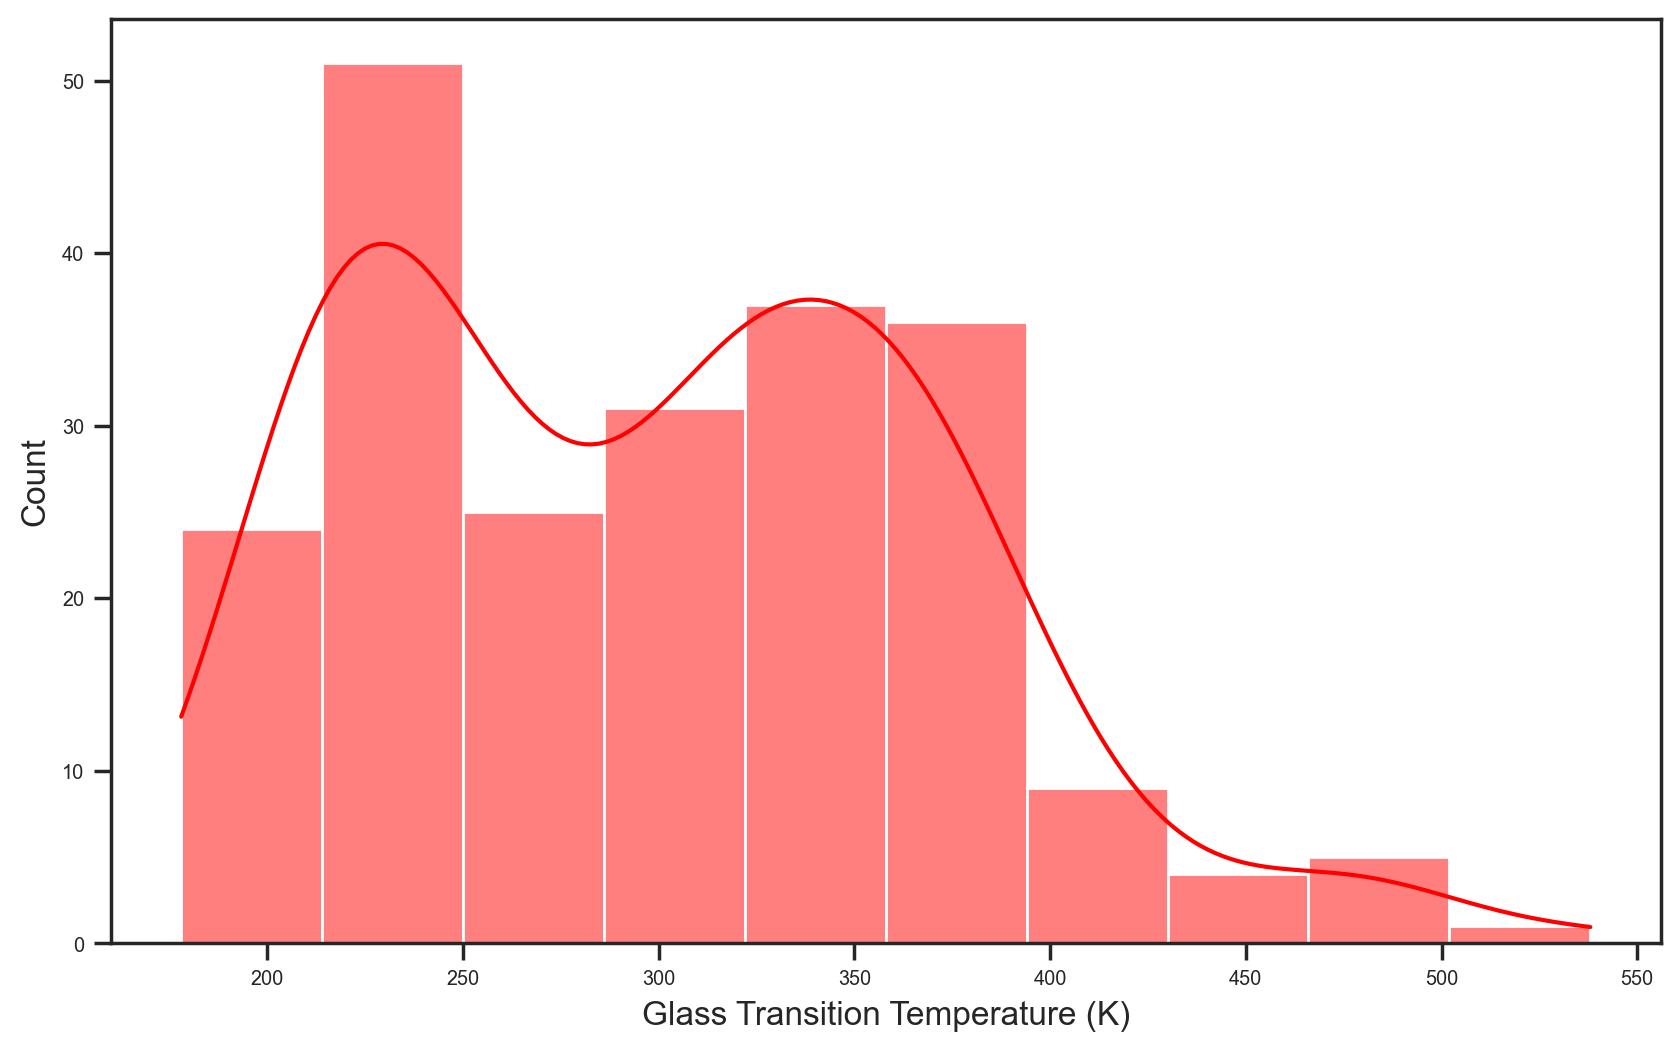

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图的大小
plt.figure(figsize=(10, 6), dpi=200)
sns.set_theme(style="ticks", font_scale=0.65)

# 绘制密度分布图
sns.histplot(x='Temperature [K]', data=data, kde=True, color='red')
plt.xlabel("Glass Transition Temperature (K)", fontname="Arial", fontsize=12)
plt.ylabel("Count", fontname="Arial", fontsize=12)
# plt.xticks(rotation=45)
# plt.yaxis.set_label_coords(0.5, -0.2)

# 保存图像
plt.savefig('../figures/density_plot_1.png', dpi=200, bbox_inches='tight')
plt.show()